In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [4]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

training_images_scaled = training_images / 255
test_images_scaled = test_images / 255

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu, input_shape = (28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation = tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = tf.nn.relu),
    tf.keras.layers.Dense(10, activation = tf.nn.softmax)
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(training_images_scaled.reshape(-1, 28, 28, 1), training_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.5670 - accuracy: 0.7933
Epoch 2/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2864 - accuracy: 0.8930
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2319 - accuracy: 0.9133
Epoch 4/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1909 - accuracy: 0.9280
Epoch 5/5
1875/1875 [==============================] - 40s 22ms/step - loss: 0.1566 - accuracy: 0.9412


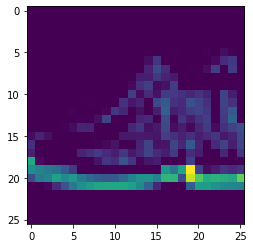

In [13]:
import matplotlib.pyplot as plt
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
pred = activation_model.predict(test_images[0].reshape(1, 28, 28, 1))
plt.imshow(pred[0][0, :, :, 2])